<a href="https://colab.research.google.com/github/aarjunsrinivasan/ENP808Y-Assignment2/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##                                                  MNIST Classification

In [0]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib

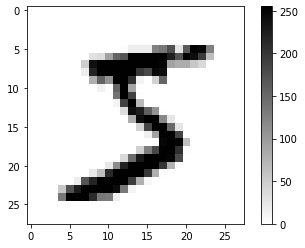

In [0]:
# Data Downloading
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
plt.imshow(train_images[0],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.savefig('5.png')
# plt.show()

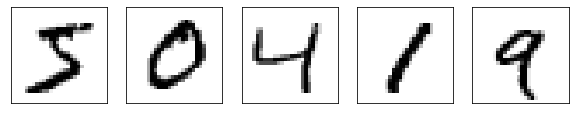

<Figure size 432x288 with 0 Axes>

In [0]:
#Data  Normalising
train_images, test_images = train_images / 255.0, test_images / 255.0
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()
plt.savefig('502.png')


In [0]:
#Data Reshaping
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [0]:
# Model Creation

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        3

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
hist=model.fit(x=train_images, 
            y=train_labels, 
            epochs=5, 
            validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 58s 973us/sample - loss: 0.0035 - accuracy: 0.9988 - val_loss: 0.0304 - val_accuracy: 0.9929
Epoch 2/5
60000/60000 [==============================] - 58s 973us/sample - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0321 - val_accuracy: 0.9930
Epoch 3/5
60000/60000 [==============================] - 58s 971us/sample - loss: 0.0038 - accuracy: 0.9986 - val_loss: 0.0279 - val_accuracy: 0.9930
Epoch 4/5
60000/60000 [==============================] - 60s 992us/sample - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0315 - val_accuracy: 0.9936
Epoch 5/5
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0289 - val_accuracy: 0.9930


## LOSS CURVE


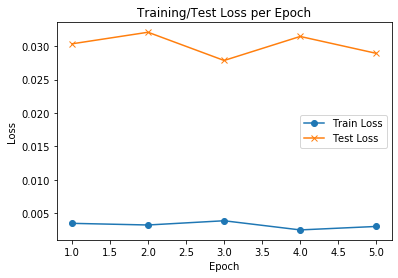

In [0]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
ax.legend(['Train Loss', 'Test Loss'], loc = 0)
ax.set_title('Training/Test Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss') 
plt.savefig('mnlossmycnn')
plt.show()


## ACCURACY CURVE

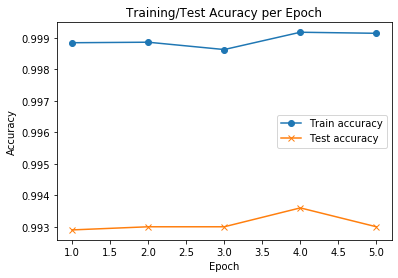

In [0]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')
ax.legend(['Train accuracy', 'Test accuracy'], loc = 0)
ax.set_title('Training/Test Acuracy per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy') 
plt.savefig('mnaccmycnn')
plt.show()

In [0]:
train_score=model.evaluate(train_images,train_labels, verbose=0)
print("Train Accuracy: %.2f%%" % (train_score[1]*100))

Train Accuracy: 99.99%


In [0]:
test_score=model.evaluate(test_images,test_labels, verbose=0)
print("Test Accuracy: %.2f%%" % (test_score[1]*100))

Test Accuracy: 99.30%


## TEST DATA CONFUSION MATRIX

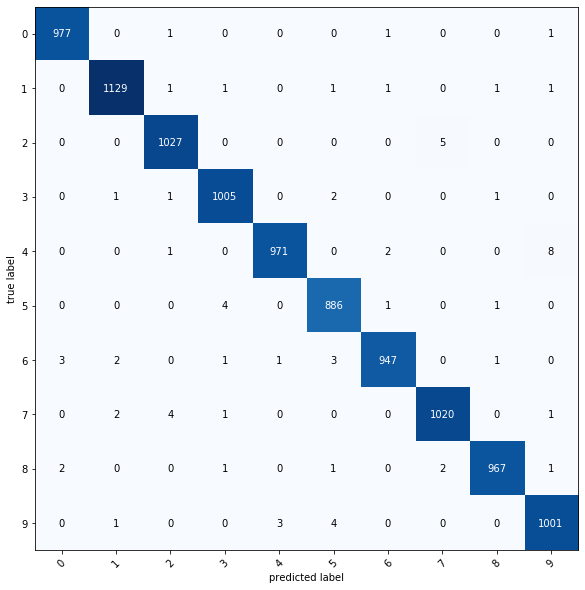

In [0]:
y_true=test_labels
y_pred=model.predict_classes(test_images)
classes=[0,1,2,3,4,5,6,7,8,9]
mat = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(10, 10), class_names = classes, show_normed=False)
plt.savefig('mncfm_test_mycnn')

## TRAIN DATA CONFUSION MATRIX

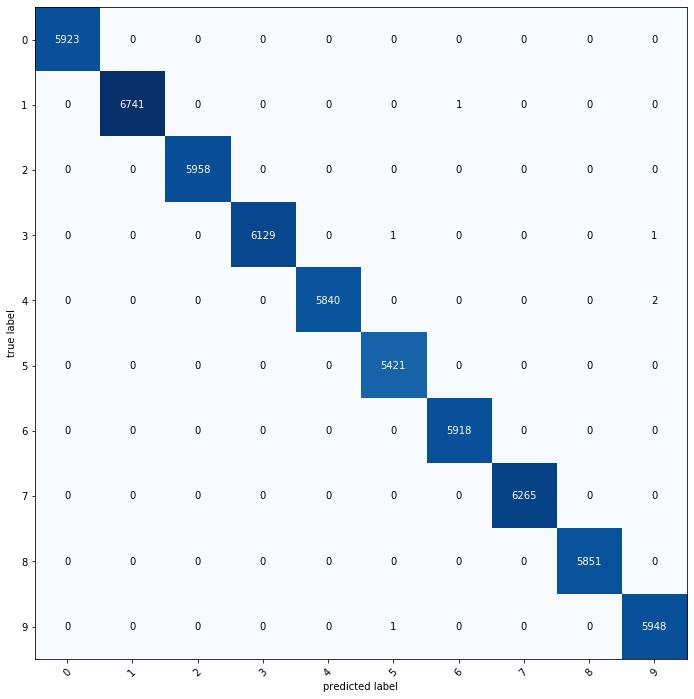

In [0]:
ytrain_true=train_labels
ytrain_pred=model.predict_classes(train_images)
mat = confusion_matrix(ytrain_true, ytrain_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(12, 12), class_names = classes, show_normed=False)
plt.savefig('mncfm_train_mycnn')

In [0]:
# probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
# predictions = probability_model.predict(test_images)
predictions = model.predict(test_images)
p=0
for i in range(10000):
    a=predictions[i].argsort()[-3:][::-1]
    if y_true[i] in a:
                   p=p+1


## LENET-5 

In [0]:
#Instantiate an empty model
lmodel = models.Sequential()

# C1 Convolutional Layer
lmodel.add(layers.Conv2D(6,(5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1), padding="same"))

# S2 Pooling Layer
lmodel.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# C3 Convolutional Layer
lmodel.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

# S4 Pooling Layer
lmodel.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# C5 Fully Connected Convolutional Layer
lmodel.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
#Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())

# FC6 Fully Connected Layer
lmodel.add(layers.Dense(84, activation='relu'))

#Output Layer with softmax activation
lmodel.add(layers.Dense(10, activation='softmax'))

In [0]:
lmodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_4 (Average (None, 27, 27, 6)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 23, 23, 16)        2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 120)         48120     
_________________________________________________________________
dense_6 (Dense)              (None, 7, 7, 84)          10164     
_________________________________________________________________
dense_7 (Dense)              (None, 7, 7, 10)         

In [0]:
lmodel.compile(optimizer='SGD',learning_rate=0.001,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
hist2 = model.fit(x=train_images,y=train_labels, epochs=4, batch_size=128, validation_data=(test_images, test_labels), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 56s 936us/sample - loss: 1.8451e-04 - accuracy: 1.0000 - val_loss: 0.0273 - val_accuracy: 0.9942
Epoch 2/4
60000/60000 [==============================] - 56s 940us/sample - loss: 3.3897e-04 - accuracy: 0.9999 - val_loss: 0.0293 - val_accuracy: 0.9940
Epoch 3/4
60000/60000 [==============================] - 57s 950us/sample - loss: 2.2105e-04 - accuracy: 0.9999 - val_loss: 0.0289 - val_accuracy: 0.9939
Epoch 4/4
60000/60000 [==============================] - 57s 953us/sample - loss: 1.1358e-04 - accuracy: 1.0000 - val_loss: 0.0267 - val_accuracy: 0.9944


## LOSS CURVE


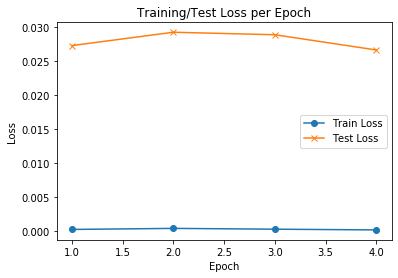

In [0]:
f, ax = plt.subplots()
ax.plot([None] + hist2.history['loss'], 'o-')
ax.plot([None] + hist2.history['val_loss'], 'x-')
ax.legend(['Train Loss', 'Test Loss'], loc = 0)
ax.set_title('Training/Test Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss') 
plt.savefig('mnlossl5')
plt.show()


## ACCURACY CURVE

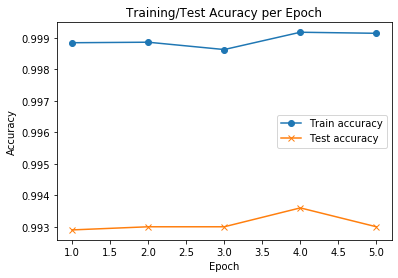

In [0]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')
ax.legend(['Train accuracy', 'Test accuracy'], loc = 0)
ax.set_title('Training/Test Acuracy per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy') 
plt.savefig('mnaccl5')
plt.show()

In [0]:
train_score=model.evaluate(train_images,train_labels, verbose=0)
print("Train Accuracy: %.2f%%" % (train_score[1]*100))

Train Accuracy: 100.00%


In [0]:
test_score=model.evaluate(test_images,test_labels, verbose=0)
print("Test Accuracy: %.2f%%" % (test_score[1]*100))

Test Accuracy: 99.30%


## TEST DATA CONFUSION MATRIX

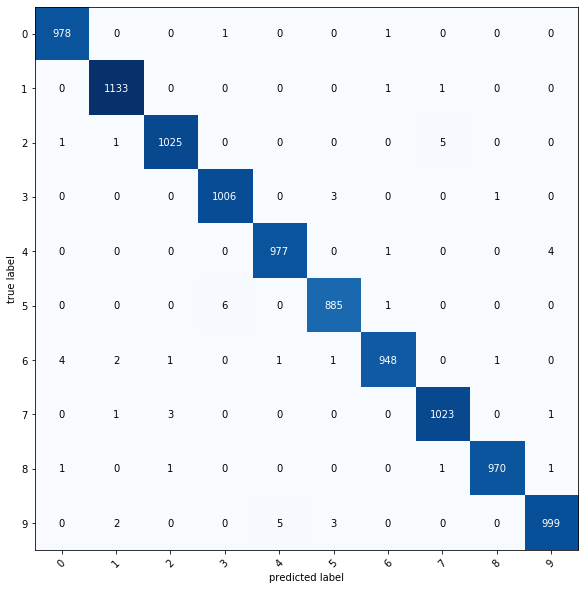

In [0]:
y_true=test_labels
y_pred=model.predict_classes(test_images)
classes=[0,1,2,3,4,5,6,7,8,9]
mat = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(10, 10), class_names = classes, show_normed=False)
plt.savefig('mncfm_test_l5')

## TRAIN DATA CONFUSION MATRIX

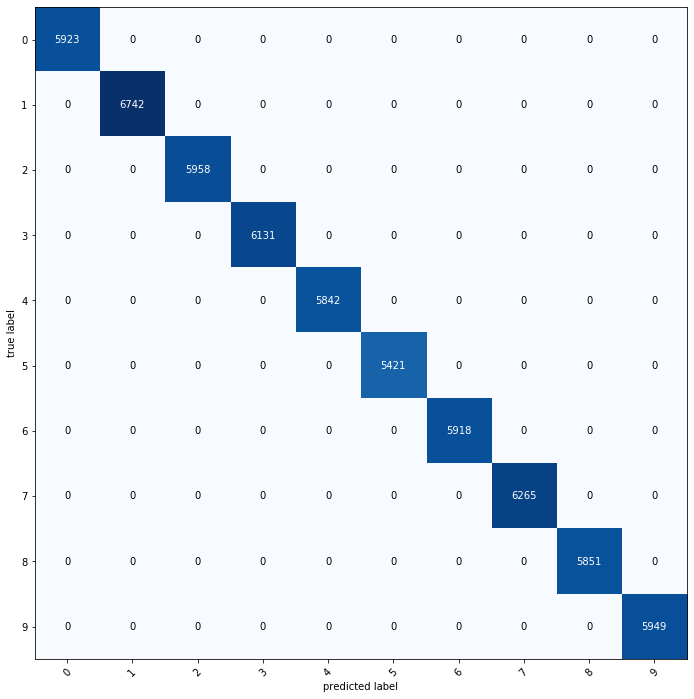

In [0]:
ytrain_true=train_labels
ytrain_pred=model.predict_classes(train_images)
mat = confusion_matrix(ytrain_true, ytrain_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(12, 12), class_names = classes, show_normed=False)
plt.savefig('mncfm_train_l5')